In [1]:
from CRYSTALpytools.crystal_io import Properties_output

obj = Properties_output('WSe2_prop.out').read_relativistics('WSe2_prop.f25',
                                                            type='SPICURDENS')

In [2]:
obj.base

array([[ 0.        ,  1.72622369,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.49495208, -0.8631092 ,  0.        ]])

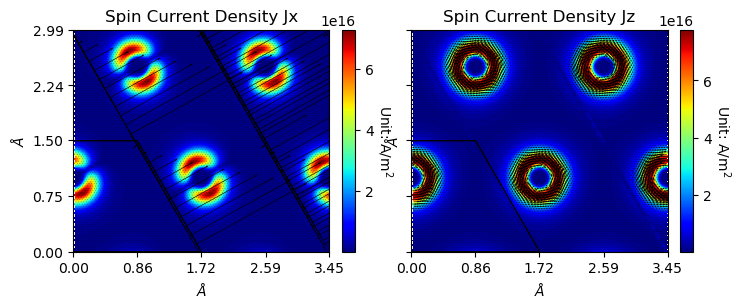

In [2]:
import numpy as np

levels = np.linspace(-1, 2, 100)*1e-8

fig = obj.plot_2D(colorplot=True, rectangle=True, edgeplot=True, b_range=[-1, 1],
                  a_range=[-1, 1], direction=['x', 'z'], figsize=[8, 10])

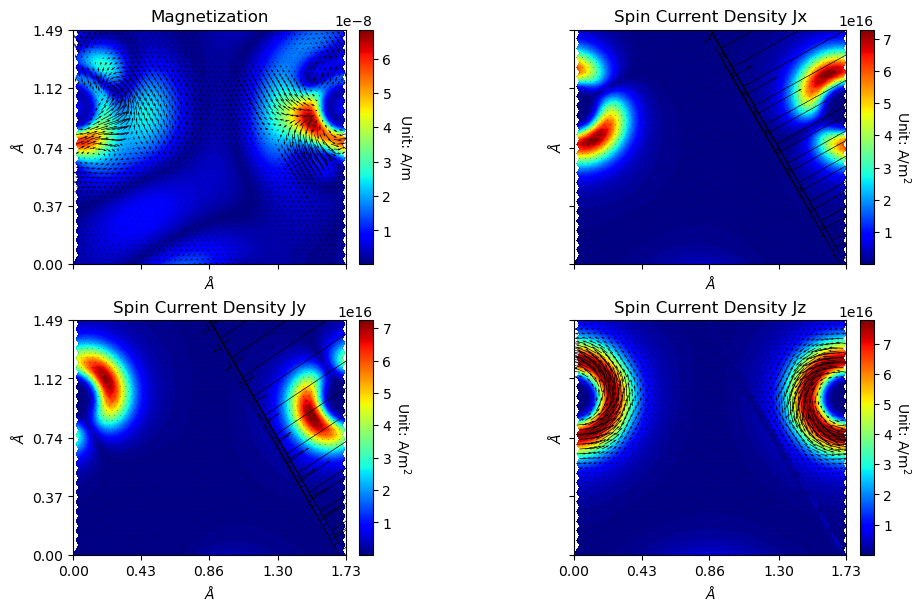

In [4]:
from CRYSTALpytools.plot import plot_relativistics2D

fig = plot_relativistics2D('WSe2_prop.f25', type=['MAGNETIZ', 'SPICURDENS'],rectangle=True,
                           output='WSe2_prop.out', layout=[2, 2], figsize=[10, 6])